## **ASSIGNMENT - NEURAL NETWORK :**

Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.
- Deep Learning is a part of machine learning that uses deep neural networks to learn patterns directly from data. It evolved from simple perceptrons to multi-layer networks and differs from traditional ML by automatically learning features instead of relying on manual feature engineering.
---
Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?
- A perceptron multiplies inputs with weights, adds bias, applies an activation function, and gives an output.
Limitation: It works only for linearly separable problems and fails on cases like XOR.
---
Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.
- Activation functions add non-linearity to neural networks.
- Sigmoid: Output between 0 and 1
- ReLU: Fast and simple, widely used but can cause dead neurons.
- Tanh: Output between –1 and 1
---
Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples.
- Loss function: Error for a single sample (e.g., cross-entropy).
- Cost function: Average error over all samples.
---
Question 5: What is the role of optimizers in neural networks? Compare Gradient
Descent, Adam, and RMSprop.
- Optimizers adjust weights to reduce error.
- Gradient Descent: Simple but slow.
- Adam: Fast and most commonly used.
---

Question 6: Write a Python program to implement a single-layer perceptron from
scratch using NumPy to solve the logical AND gate.

In [9]:
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

w = np.zeros(2)
b = 0
lr = 0.1

for _ in range(10):
    for xi, yi in zip(X, y):
        y_pred = 1 if np.dot(xi, w) + b >= 0 else 0
        w += lr * (yi - y_pred) * xi
        b += lr * (yi - y_pred)

print([1 if np.dot(xi, w) + b >= 0 else 0 for xi in X])


[0, 0, 0, 1]


Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions
using Matplotlib.

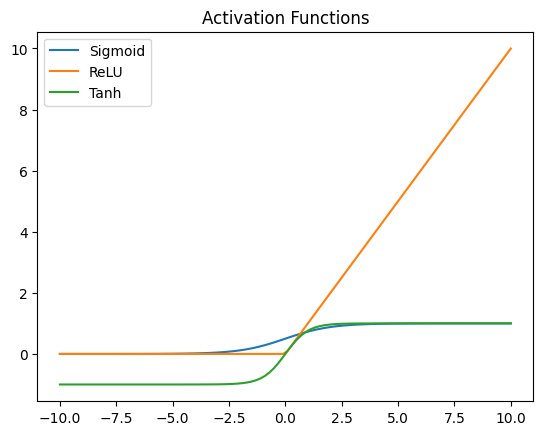

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, relu, label="ReLU")
plt.plot(x, tanh, label="Tanh")
plt.legend()
plt.title("Activation Functions")
plt.show()


Question 8: Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

In [2]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

(X_train, y_train), _ = mnist.load_data()

X_train = X_train / 255.0
y_train = to_categorical(y_train, 10)

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

print("Training Accuracy:", history.history["accuracy"][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training Accuracy: 0.9854166507720947


Question 9: Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


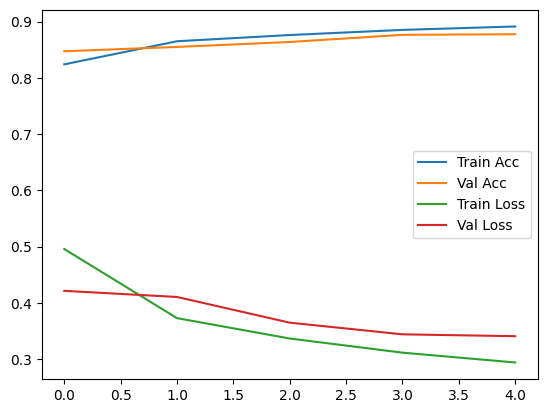

In [8]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=0)

plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()


Question 10: You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.

Explain your real-time data science workflow:
- ● How would you design a deep learning model (perceptron or multilayer NN)?
- ● Which activation function and loss function would you use, and why?
- ● How would you train and evaluate the model, considering class imbalance?
- ● Which optimizer would be suitable, and how would you prevent overfitting?

#####ANSWER:
- Model Design: Use a multilayer neural network (MLP) since transaction data is structured and complex; a single perceptron is too simple for fraud patterns.

- Activation & Loss: Use ReLU in hidden layers for fast learning and Sigmoid in the output layer with Binary Cross-Entropy loss for binary classification.

- Training & Evaluation: Handle class imbalance using class weights or oversampling (SMOTE); evaluate using Precision, Recall, F1-score, and ROC-AUC, focusing on Recall for fraud cases.

- Optimizer & Overfitting: Use Adam optimizer for fast convergence; prevent overfitting with dropout, early stopping, and regularization.